In [2]:
import os
import time

# data science imports
import math
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

# utils import
#from fuzzywuzzy import fuzz

# visualization imports
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df_restaurants = pd.read_csv( "/content/drive/My Drive/Avondale_Restaurant_Review.csv", delimiter=",", engine='python',
                        usecols=['business_id', 'restaurant_name'],dtype={'business_id': 'str', 'restaurant_name': 'str'} )

df_ratings = pd.read_csv(
    "/content/drive/My Drive/Avondale_Restaurant_Review.csv", delimiter=",", engine='python',
    usecols=['user_id', 'business_id', 'stars'],
    dtype={'user_id': 'str', 'business_id': 'str', 'stars': 'float32'})



In [0]:
df_reviews= pd.read_csv( "/content/drive/My Drive/Avondale_Restaurant_Review.csv", delimiter=",", engine='python',
                        usecols=['business_id', 'restaurant_name' ,'text','date','stars'],dtype={'business_id': 'str', 'restaurant_name': 'str','text':'str','date':'str','stars':'float32'} )


In [6]:
num_users = len(df_ratings.user_id.unique())
num_items = len(df_restaurants.restaurant_name.unique())
print('There are {} unique users and {} unique restaurants in this data set'.format(num_users, num_items))

There are 8031 unique users and 163 unique restaurants in this data set


In [0]:
df_restaurants_uniq=df_restaurants.drop_duplicates(subset='restaurant_name', keep="first")


<bound method DataFrame.info of        count
stars       
1.0     2046
2.0     1245
3.0     1390
4.0     2739
5.0     5242>


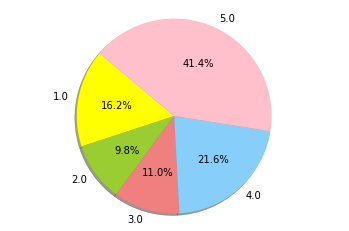

In [8]:
df_ratings_cnt_tmp = pd.DataFrame(df_ratings.groupby('stars').size(), columns=['count'])
print(df_ratings_cnt_tmp.info)
labels = df_ratings_cnt_tmp.index
sizes = df_ratings_cnt_tmp['count']
colors = ['yellow', 'yellowgreen', 'lightcoral', 'lightskyblue','pink']
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [9]:
df_top_rated_Restaurants = pd.DataFrame(df_restaurants.groupby('restaurant_name').size(), columns=['count']).sort_values('count', ascending=False)
df_top_rated_Restaurants.head(10)
# df_top_rated_Restaurants.info()

,count
restaurant_name,
Flavors of Louisiana,753
Pita Kitchen - Avondale,596
Fiesta Mexicana,481
Colados Coffee & Crepes,386
TJ's Homestyle Restaurant,323
Zeta's Grill,311
Don Pancho Mexican Food,282
India Garden,279
Thai Gourmet,259


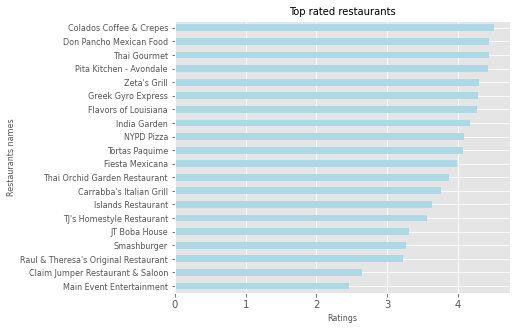

In [11]:
df_ratings['name'] = df_ratings['business_id'].map(df_restaurants_uniq.set_index('business_id')['restaurant_name'])
top_restaurants = df_ratings.name.value_counts().index[:20].tolist()
df_review_top = df_ratings.loc[df_ratings['name'].isin(top_restaurants)]

df_review_top.groupby(df_review_top.name)['stars'].mean().sort_values(ascending=True).plot(kind='barh',figsize=(6, 5),color='lightblue')
plt.yticks(fontsize=8)
plt.title('Top rated restaurants',fontsize=10)
plt.ylabel('Restaurants names', fontsize=8)
plt.xlabel('Ratings', fontsize=8)
plt.rcParams['axes.facecolor'] = 'white'
# plt.grid(c='grey')
plt.show()

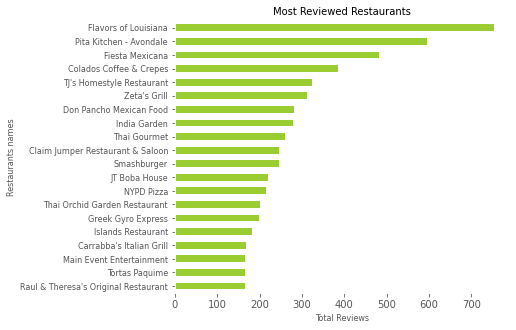

In [12]:
# pd.DataFrame(df_restaurants.groupby('restaurant_name').size(), columns=['count']).sort_values('count', ascending=False)
df_review_top.groupby(df_review_top.name).size().sort_values(ascending=True).plot(kind='barh',figsize=(6, 5),color='yellowgreen')
plt.yticks(fontsize=8)
plt.title('Most Reviewed Restaurants',fontsize=10)
plt.ylabel('Restaurants names', fontsize=8)
plt.xlabel('Total Reviews', fontsize=8)
plt.rcParams['axes.facecolor'] = 'white'
plt.show()

In [0]:
df_review_top.groupby(df_review_top.name)['stars'].mean().sort_values(ascending=False)

name
Colados Coffee & Crepes                 4.507772
Don Pancho Mexican Food                 4.446808
Thai Gourmet                            4.444016
Pita Kitchen - Avondale                 4.426175
Zeta's Grill                            4.299036
Greek Gyro Express                      4.281407
Flavors of Louisiana                    4.265604
India Garden                            4.168459
NYPD Pizza                              4.088785
Tortas Paquime                          4.078788
Fiesta Mexicana                         3.989605
Thai Orchid Garden Restaurant           3.876238
Carrabba's Italian Grill                3.766467
Islands Restaurant                      3.633880
TJ's Homestyle Restaurant               3.557276
JT Boba House                           3.315068
Smashburger                             3.261225
Raul & Theresa's Original Restaurant    3.230303
Claim Jumper Restaurant & Saloon        2.648980
Main Event Entertainment                2.457831
Name: stars, dt

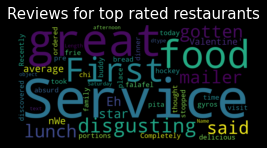

In [14]:
from wordcloud import WordCloud
df_review_top = df_reviews.loc[df_reviews['restaurant_name'].isin(top_restaurants)]
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000)
# generate word cloud using df_yelp_tip_top['text_clear']
wc.generate(str(df_review_top['text']))
# declare our figure 
plt.figure(figsize=(6,5), facecolor='k')
# add title to the graph
plt.title("Reviews for top rated restaurants", fontsize=15,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
# after lot of congiguration finally plot the graph
plt.show()

In [15]:
total_cnt = num_users * num_items
rating_zero_cnt = total_cnt - df_ratings.shape[0]
# append counts of zero rating to df_ratings_cnt
df_ratings_cnt = df_ratings_cnt_tmp.append(
    pd.DataFrame({'count': rating_zero_cnt}, index=[0.0]),
    verify_integrity=True,
).sort_index()
df_ratings_cnt


,count
0.0,1296391
1.0,2046
2.0,1245
3.0,1390
4.0,2739
5.0,5242


In [16]:
df_ratings_cnt['log_count'] = np.log(df_ratings_cnt['count'])
df_ratings_cnt


,count,log_count
0.0,1296391,14.075095
1.0,2046,7.623642
2.0,1245,7.126891
3.0,1390,7.237059
4.0,2739,7.915348
5.0,5242,8.564458


In [18]:
df_restaurant_cnt = pd.DataFrame(df_reviews.groupby('restaurant_name').size(), columns=['count'])
df_restaurant_cnt.head()

,count
restaurant_name,
1 Brothers Pizza,64
5395 West Soul Food Place,4
99 Pub and Grill,49
AJK Chinese Cusine,83
Aguila's Hidaway,14


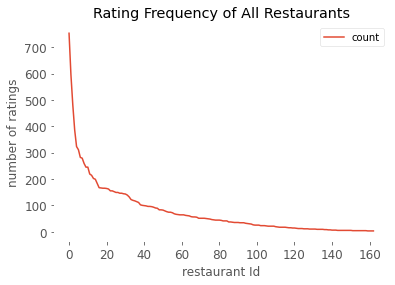

In [33]:
ax = df_restaurant_cnt \
    .sort_values('count', ascending=False) \
    .reset_index(drop=True) \
    .plot(
        figsize=(6, 4),
        title='Rating Frequency of All Restaurants',
        fontsize=12
    )
ax.set_xlabel("restaurant Id")
ax.set_ylabel("number of ratings")
plt.rcParams['axes.facecolor'] = 'white'

In [21]:
df_restaurant_cnt['count'].quantile(np.arange(1, 0.6, -0.05))


1.00    753.0
0.95    257.6
0.90    166.8
0.85    151.1
0.80    128.0
0.75     98.5
0.70     83.0
0.65     66.6
Name: count, dtype: float64

In [22]:
df_users_cnt = pd.DataFrame(df_ratings.groupby('user_id').size(), columns=['count'])
df_users_cnt.head()

,count
user_id,
--KKFIKZpMeRy8fLNp0brA,1
--jIff_lr2CN1cvnuoC14A,1
--tNWiVft2ZV6BWaRkOpnw,1
--xazodgk012WDgg9sOkdg,4
-0kiduTUToVYFqN_NEqMSw,2


In [0]:
# filter data
popularity_thres = 50
popular_restaurants = list(set(df_restaurant_cnt.query('count >= @popularity_thres').index))
df_ratings_drop_restaurants = df_ratings[df_ratings.business_id.isin(popular_restaurants)]

In [39]:
df_users_cnt = pd.DataFrame(df_ratings.groupby('user_id').size(), columns=['count'])
df_users_cnt.head()

,count
user_id,
--KKFIKZpMeRy8fLNp0brA,1
--jIff_lr2CN1cvnuoC14A,1
--tNWiVft2ZV6BWaRkOpnw,1
--xazodgk012WDgg9sOkdg,4
-0kiduTUToVYFqN_NEqMSw,2


Text(0, 0.5, 'number of ratings')

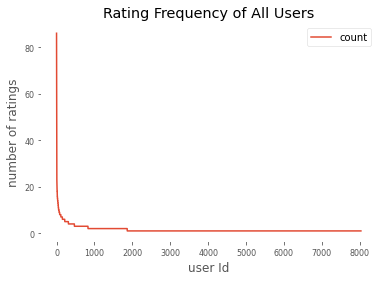

In [34]:
ax = df_users_cnt \
    .sort_values('count', ascending=False) \
    .reset_index(drop=True) \
    .plot(
        figsize=(6, 4),
        title='Rating Frequency of All Users',
        fontsize=8
    )
ax.set_xlabel("user Id")
ax.set_ylabel("number of ratings")

In [26]:
df_users_cnt['count'].quantile(np.arange(1, 0.5, -0.05))


1.00    86.0
0.95     4.0
0.90     3.0
0.85     2.0
0.80     2.0
0.75     1.0
0.70     1.0
0.65     1.0
0.60     1.0
0.55     1.0
Name: count, dtype: float64

In [0]:
# filter data
ratings_thres = 1
active_users = list(set(df_users_cnt.query('count >= @ratings_thres').index))
df_ratings_drop_users = df_ratings_drop_restaurants[df_ratings_drop_restaurants.user_id.isin(active_users)]

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


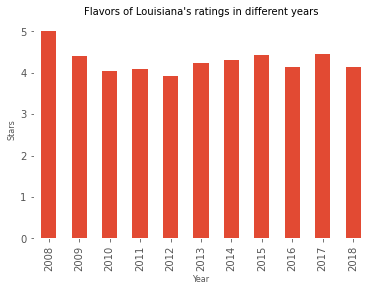

In [36]:
df_fol_only = df_reviews.loc[df_reviews['restaurant_name'] == 'Flavors of Louisiana']
#df_fol_only = df_reviews.loc[df_reviews['restaurant_name'] == 'Colados Coffee & Crepes']
df_fol_review = df_reviews.loc[df_reviews['business_id'].isin(df_fol_only.business_id)]
df_fol_review.date = pd.to_datetime(df_fol_review.date)
df_fol_review.groupby(df_fol_review.date.dt.year)['stars'].mean().plot(kind='bar', figsize=(6, 4))
plt.title("Flavors of Louisiana's ratings in different years", fontsize=10)
plt.xlabel('Year', fontsize=8)
plt.ylabel('Stars', fontsize=8)
plt.show()

